   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

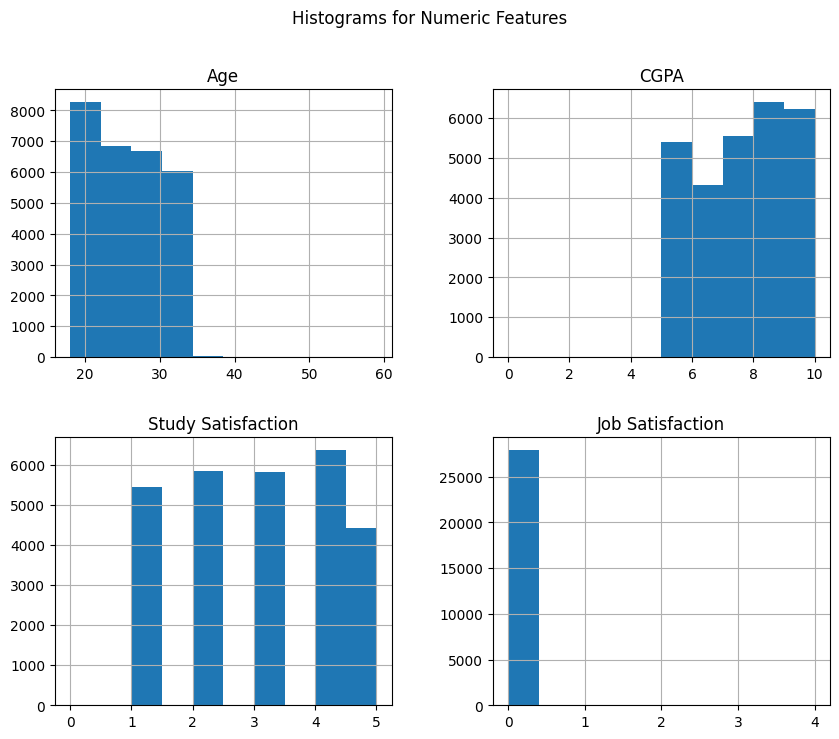

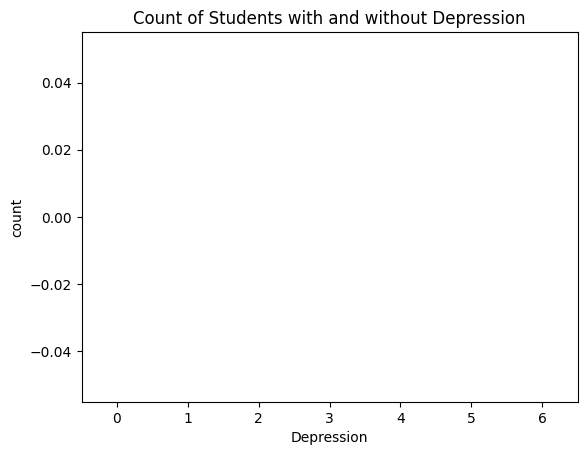

ValueError: could not convert string to float: 'Student'

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("student_depression_dataset.csv")

print(df.head()) 
print(df.info()) 

print(df.isnull().sum()) 

df_clean = df.dropna()

df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
df['Depression'] = df['Depression'].map({'Yes': 1, 'No': 0})

df = pd.get_dummies(df, columns=['Gender', 'City'], drop_first=True)

df['CGPA'] = pd.to_numeric(df['CGPA'], errors='coerce') 

df[['Age', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration']].hist(figsize=(10, 8))
plt.suptitle("Histograms for Numeric Features")
plt.show()

sns.countplot(x='Depression', data=df)
plt.title("Count of Students with and without Depression")
plt.show()

correlation_matrix = df.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

sns.boxplot(x='Depression', y='CGPA', data=df)
plt.title("Boxplot of CGPA by Depression Status")
plt.show()

sns.pairplot(df[['Age', 'CGPA', 'Sleep Duration', 'Depression']])
plt.suptitle("Pairplot for Selected Features", y=1.02)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X = df.drop(columns=['Depression', 'id'])  
y = df['Depression']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

for drop_feature in X.columns:
    X_new = X.drop(columns=[drop_feature])
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.2, random_state=42)
    model2 = DecisionTreeRegressor(random_state=42)
    model2.fit(X_train2, y_train2)
    y_pred2 = model2.predict(X_test2)
    mae2 = mean_absolute_error(y_test2, y_pred2)
    r2_2 = r2_score(y_test2, y_pred2)
    print(f"\nWithout {drop_feature}:")
    print(f"MAE: {mae2}")
    print(f"R² Score: {r2_2}")


ValueError: could not convert string to float: 'Student'

Third Try ;(


--- Part 1: Load and Clean the Data ---
Cleaned dataset:
   id  Gender   Age           City Profession  Academic Pressure  \
0   2       1  33.0  Visakhapatnam    Student                5.0   
1   8       0  24.0      Bangalore    Student                2.0   
2  26       1  31.0       Srinagar    Student                3.0   
3  30       0  28.0       Varanasi    Student                3.0   
4  32       0  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  Sleep Duration  \
0            0.0  8.97                 2.0               0.0            56.0   
1            0.0  5.90                 5.0               0.0            56.0   
2            0.0  7.03                 5.0               0.0             5.0   
3            0.0  5.59                 2.0               0.0            78.0   
4            0.0  8.13                 3.0               0.0            56.0   

  Dietary Habits   Degree  Have you ever had suicida

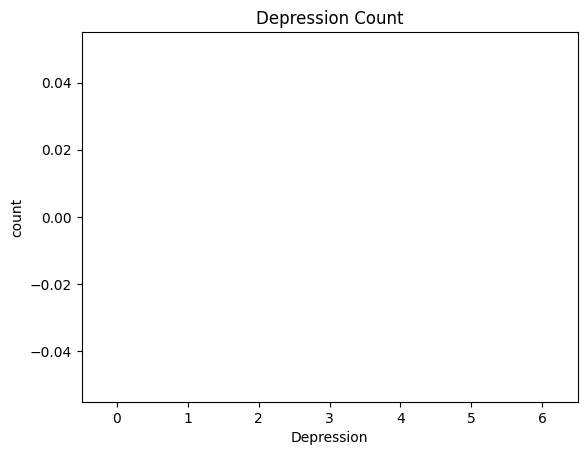

Skipping Sleep Duration boxplot due to insufficient class variation or missing data.
Skipping CGPA boxplot due to insufficient class variation or missing data.

--- Part 3: Modeling ---


ValueError: Input y contains NaN.

In [ ]:

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv("student_depression_dataset.csv")

df.columns = df.columns.str.strip()

for col in df.columns:
    if df[col].astype(str).str.strip().eq('').all():
        df.drop(columns=[col], inplace=True)

if 'Sleep Duration' in df.columns:
    df['Sleep Duration'] = df['Sleep Duration'].astype(str).str.strip().str.replace(r'[^0-9.]', '', regex=True)
    df['Sleep Duration'] = pd.to_numeric(df['Sleep Duration'], errors='coerce')

for col in ['Age', 'CGPA']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=['Age', 'CGPA', 'Sleep Duration'], inplace=True)

if 'Depression' in df.columns:
    df['Depression'] = df['Depression'].map({'Yes': 1, 'No': 0})
if 'Have you ever had suicidal thoughts ?' in df.columns:
    df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
if 'Family History of Mental Illness' in df.columns:
    df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

print("Cleaned dataset:")
print(df.head())

if 'Depression' in df.columns:
    sns.countplot(x='Depression', data=df)
    plt.title("Depression Count")
    plt.show()

    if 'Sleep Duration' in df.columns:
        grouped_sleep = df[['Depression', 'Sleep Duration']].dropna()
        if grouped_sleep['Depression'].nunique() >= 2:
            sns.boxplot(x='Depression', y='Sleep Duration', data=grouped_sleep)
            plt.title("Sleep Duration vs Depression")
            plt.show()
        else:
            print("Skipping Sleep Duration boxplot due to insufficient class variation or missing data.")

    if 'CGPA' in df.columns:
        grouped_cgpa = df[['Depression', 'CGPA']].dropna()
        if grouped_cgpa['Depression'].nunique() >= 2:
            sns.boxplot(x='Depression', y='CGPA', data=grouped_cgpa)
            plt.title("CGPA vs Depression")
            plt.show()
        else:
            print("Skipping CGPA boxplot due to insufficient class variation or missing data.")


features = ['Age', 'Gender', 'CGPA', 'Sleep Duration',
            'Have you ever had suicidal thoughts ?',
            'Family History of Mental Illness']

if all(f in df.columns for f in features + ['Depression']):
    X = df[features]
    y = df['Depression']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))

    for drop_feature in features:
        X_new = X.drop(columns=[drop_feature])
        X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.2, random_state=1)
        model2 = DecisionTreeRegressor()
        model2.fit(X_train2, y_train2)
        y_pred2 = model2.predict(X_test2)
        print(f"\nWithout {drop_feature}:")
        print("MAE:", mean_absolute_error(y_test2, y_pred2))
        print("R^2 Score:", r2_score(y_test2, y_pred2))
else:
    print("Required columns missing for modeling.")
